# Homework "Advanced linear algebra".

In [1]:
import numpy as np
import pandas as pd
float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

/var/folders/8m/pdb3kxls26vfh6fx96vt11380000gp/T/ipykernel_41034/965663681.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Level 0:

Define following matrices:

a) Diagonal and orthogonal but not ones(!)

b) Upper-triangular and orthogonal

c) Lowtriangle and orthogonal

d) Matrix with denominator = 1 and sum of elements != 0

P.S. In all tasks should be non-zero matrix with shape more then 2


#### a) Diagonal and orthogonal but not ones(!)


Diagonal matrix
$A^{T}=A$\
Orthogonal matrix
$A^{-1}=A^{T}$
Diagonal orthogonal matrix
$A^{-1}=A$

In [5]:
# Input matrix
A = np.diag([-1,-1,-1])

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]


In [7]:
# Inverted matrix
A_inv = np.linalg.inv(A)

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]


In [8]:
# Orthogonality check
print(np.allclose(A_inv, A.T))
print(np.allclose(A_inv, A))

True
True


#### Upper-triangular, orthogonal
Orthogonal matrix
$A^{-1}=A^{T}$

In [14]:
A = np.random.rand(4,4) # set random matrix

# Compute the qr factorization of a matrix.
# Factor the matrix `a` as *qr*, where `q` is orthonormal and `r` is
# upper-triangular.
Q, R = np.linalg.qr(A)

print('Upper-triangular:\n', R, '\nIf matrix Q orthogonal?\n', np.allclose(np.linalg.inv(Q), Q.T))

Upper-triangular:
 [[-0.8586 -0.7124 -0.3419 -1.0923]
 [0.0000 -0.4147 0.1858 0.6999]
 [0.0000 0.0000 -0.2252 -0.1090]
 [0.0000 0.0000 0.0000 -0.0848]] 
If matrix Q orthogonal?
 True


In [37]:
# Upper-triangular and orthogonal
A = np.diag([-1,-1,-1])

#### c) Lower-triangular, orthogonal

In [35]:
A = np.random.rand(4,4) # set a random matrix

# Compute the qr factorization of a matrix.
# Factor the matrix `a` as *qr*, where `q` is orthonormal and `r` is
# upper-triangular.
Q, R = np.linalg.qr(A)
print('Lower-triangular:\n', R.T, '\nIf matrix Q orthogonal?\n', np.allclose(np.linalg.inv(Q), Q.T))

Lower-triangular:
 [[-1.2618 0.0000 0.0000 0.0000]
 [-0.8172 -0.7773 0.0000 0.0000]
 [-1.2874 -0.5674 -0.5683 0.0000]
 [-0.9779 -0.3337 -0.3679 -0.5773]] 
If matrix Q orthogonal?
 True


In [36]:
# Lower-triangular and orthogonal
A = np.diag([-1,-1,-1])

Compute the eigenvalues and right eigenvectors of a square array.

In [38]:
m = np.array([[2, 2],
              [1, 3]])
print(m)


[[2 2]
 [1 3]]


In [40]:
W, v = np.linalg.eig(m)
print(f'Eigenvalues:\n{W}\nRight Eigenvectors:\n{v}')

Eigenvalues:
[1.0000 4.0000]
Right Eigenvectors:
[[-0.8944 -0.7071]
 [0.4472 -0.7071]]


### Level 1:

Find spectral factorization of matrix m:

In [41]:
m = np.array([[1, 2],
              [2,3]])
print(m)


[[1 2]
 [2 3]]


Spectral matrix m factorization is a sum of 3 matrices:
- S transposed
- D diagonal matrix with eigenvalues on main diagonal
- S matrix with normalized eigenvectors of matrix m in columns

In [42]:
# find eigenvalues
W, v = np.linalg.eig(m)
# gets diagonal matrix with eigenvalues on main diagonal
D = np.diag(W)

In [43]:
# find orthogonal matrix
S = v.T
S @ S.T

array([[1.0000, 0.0000],
       [0.0000, 1.0000]])

In [44]:
# Check if matrix multiplication of factorization elements equal input matrix
np.allclose(S.T @ D @ S, m)

True

Implement MNIST prediction quality dependency with respect to different amount of RCA components.\
MSE metric recommended.





--------------------------------------------------------------------------------

PCA has methods "transform" and "inverse_transofrm".\
Method "transform" makes dimensionality reduction.\
Method "inverse_transofrm" restore original data (with information loss).\

We need to calculate how accurate (average) image restores depends on number of PCA components.


Documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - MSE

Data - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [13]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

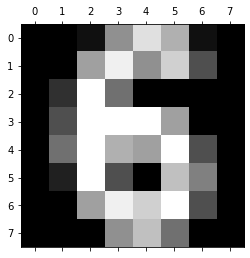

In [14]:
# Загружаем цифры
digits = load_digits()
plt.gray()
plt.matshow(digits.images[420])
plt.show()

In [15]:
def get_distance(X, n_components):
    pca = PCA(n_components=n_components)
    pca.fit_transform(X)
    X_pca = pca.transform(X)
    low = pca.inverse_transform(X_pca)
    return mean_squared_error(X, low), low

In [16]:
# We set 7 as a maximum number of PCA components because this number could not be bigger than one of matrix sizes.
# All numbers in our set have shape 8, 8
def get_dependencies(X):
    dists = dict()
    for i in range(min(X.shape)+1)[::-1]:
        dists[i], lowest_pic = get_distance(X, i)
    return dists, lowest_pic


In [17]:
def plot_dependencies(X ,with_pic_diff=True):
    d, low_pic = get_dependencies(X)
    plt.title('Quality / number of PCA components')
    plt.ylabel('MSE')
    plt.xlabel('Number of components')
    plt.plot(d.keys(), d.values(), label='line 1');
    if with_pic_diff:
        plt.gray()
        plt.matshow(X)
        plt.matshow(low_pic)

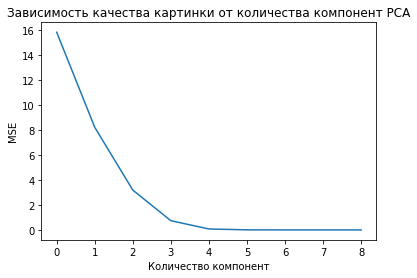

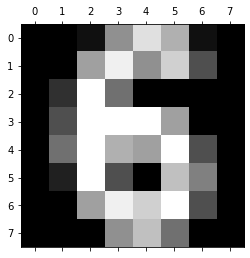

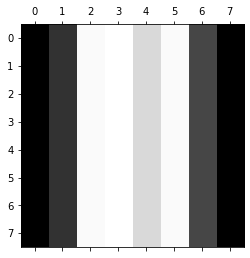

In [18]:
plot_dependencies(digits.images[420])
